# **1. Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **2. Import dataset**

In [ ]:
df = pd.read_csv('loan_approval_dataset.csv')

# **3. Exploratory Data Analysis**

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.shape

(4269, 13)

In [ ]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [ ]:
# drop load id column because it has no affect on the data or model
df.drop(columns = ['loan_id'], inplace = True)

In [ ]:
cols = df.columns
cols

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df.shape

(4269, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [ ]:
df.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


### convert categorical values into numerical

In [ ]:
# convert categorical values into numerical to make it easier to the model
pd.get_dummies(df[' education'], drop_first=True, dtype=int).head()

,Not Graduate
0,0
1,1
2,0
3,0
4,1


In [ ]:
pd.get_dummies(df[' self_employed'], drop_first=True, dtype=int).head()

,Yes
0,0
1,1
2,0
3,0
4,1


In [ ]:
# convert categorical values into numerical to make it easier to the model
pd.get_dummies(df[' loan_status'], drop_first=True, dtype=int).head()

,Rejected
0,0
1,1
2,1
3,1
4,1


In [ ]:
df = pd.get_dummies(df, drop_first=True, dtype=int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    income_annum              4269 non-null   int64
 2    loan_amount               4269 non-null   int64
 3    loan_term                 4269 non-null   int64
 4    cibil_score               4269 non-null   int64
 5    residential_assets_value  4269 non-null   int64
 6    commercial_assets_value   4269 non-null   int64
 7    luxury_assets_value       4269 non-null   int64
 8    bank_asset_value          4269 non-null   int64
 9    education_ Not Graduate   4269 non-null   int64
 10   self_employed_ Yes        4269 non-null   int64
 11   loan_status_ Rejected     4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [ ]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.497775,0.503631,0.377840
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.500054,0.500045,0.484904
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000,0.000000,0.000000
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,0.000000,1.000000,0.000000
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000,1.000000,1.000000
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000,1.000000,1.000000


### check for the outliers


In [ ]:
print(round(df.describe()),2 )

       no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
count            4269.0        4269.0       4269.0     4269.0       4269.0   
mean                2.0     5059124.0   15133450.0       11.0        600.0   
std                 2.0     2806840.0    9043363.0        6.0        172.0   
min                 0.0      200000.0     300000.0        2.0        300.0   
25%                 1.0     2700000.0    7700000.0        6.0        453.0   
50%                 3.0     5100000.0   14500000.0       10.0        600.0   
75%                 4.0     7500000.0   21500000.0       16.0        748.0   
max                 5.0     9900000.0   39500000.0       20.0        900.0   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count                    4269.0                   4269.0               4269.0   
mean                  7472617.0                4973155.0           15126306.0   
std                   6503637.0                4388966

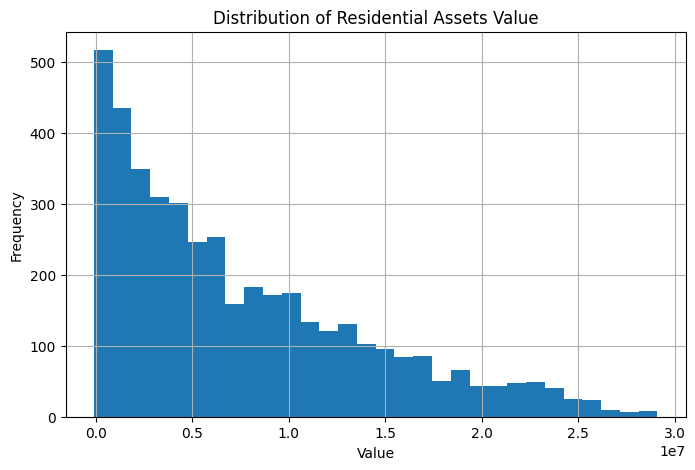

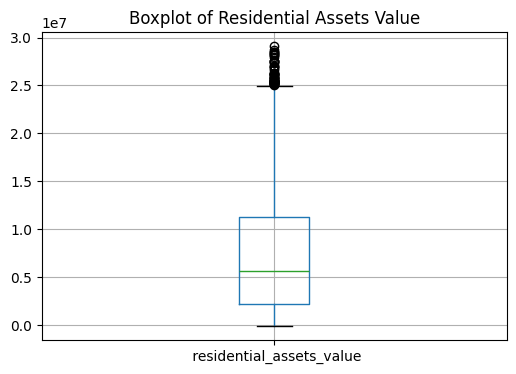

In [ ]:
#there's outlier in residential_assets_value so we'll use visualizations to dedect it
df[' residential_assets_value'].hist(bins=30, figsize=(8,5))
plt.title("Distribution of Residential Assets Value")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
df.boxplot(column=' residential_assets_value')
plt.title("Boxplot of Residential Assets Value")
plt.show()

In [ ]:
neg_count = (df[' residential_assets_value'] < 0).sum()
print("Number of negative values:", neg_count)

df[df[' residential_assets_value'] < 0]


Number of negative values: 28


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
59,4,5500000,18200000,16,797,-100000,4900000,18600000,4800000,1,1,0
196,4,400000,1500000,2,669,-100000,600000,900000,500000,1,1,0
559,2,200000,500000,6,885,-100000,0,300000,200000,0,1,1
702,4,6300000,23900000,6,899,-100000,11400000,20600000,6700000,0,1,0
737,2,900000,2500000,16,458,-100000,100000,3200000,1100000,0,1,1
784,0,5000000,14400000,2,761,-100000,7300000,12600000,4500000,0,0,0
904,2,4100000,14900000,12,571,-100000,5200000,13000000,3400000,0,0,0
1089,3,5100000,11000000,6,336,-100000,5800000,11600000,7500000,0,0,1
1163,2,4500000,9100000,18,593,-100000,600000,12400000,2500000,0,0,0
1350,5,4000000,13700000,6,496,-100000,1400000,15800000,3700000,0,0,1


In [ ]:
df = df[df[' residential_assets_value'] >= 0]


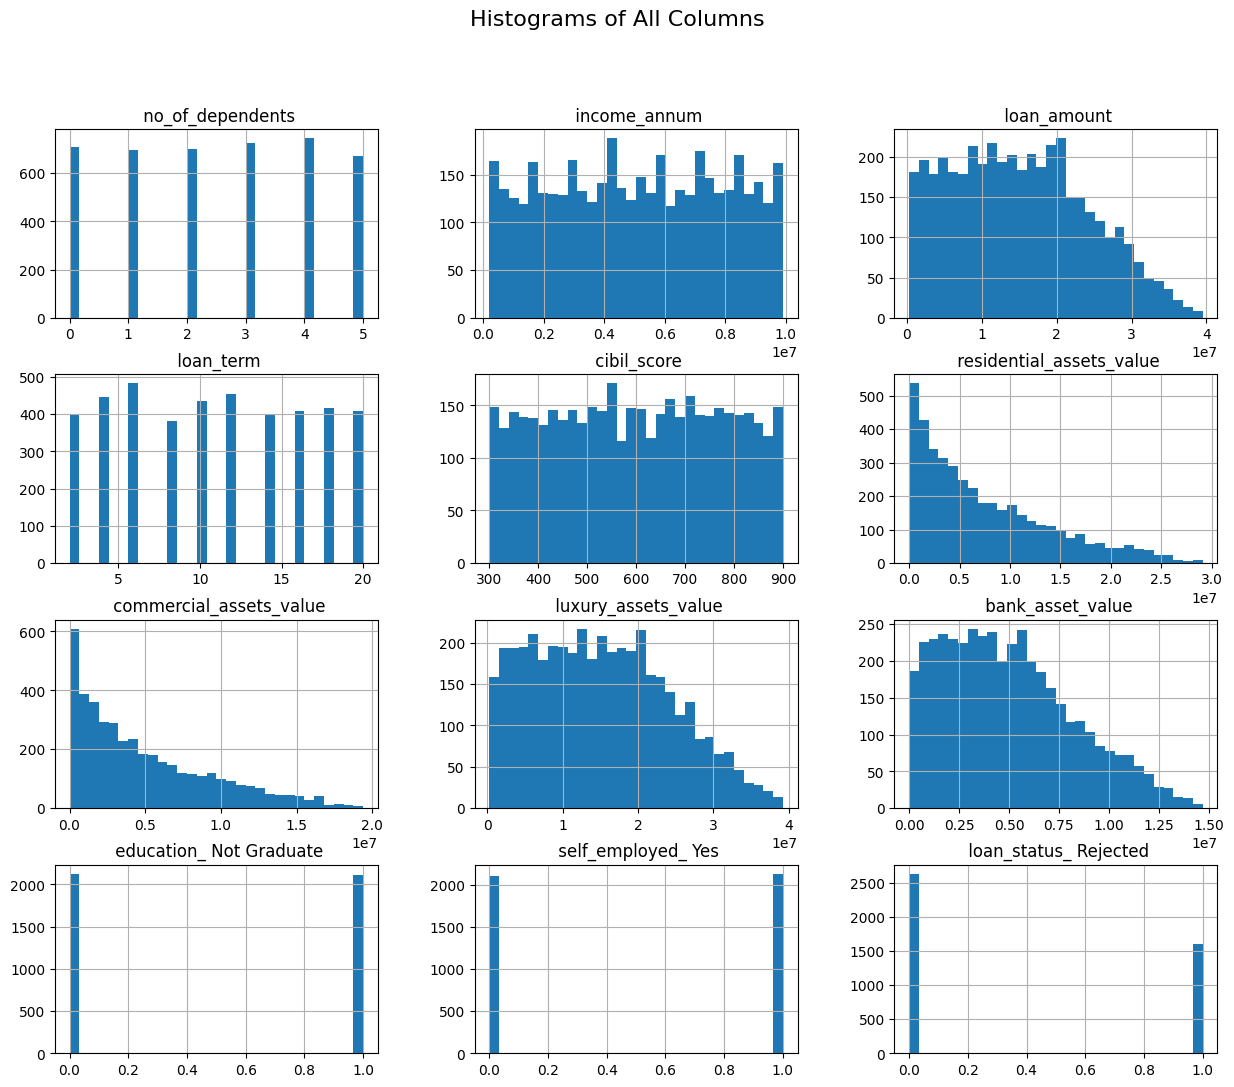

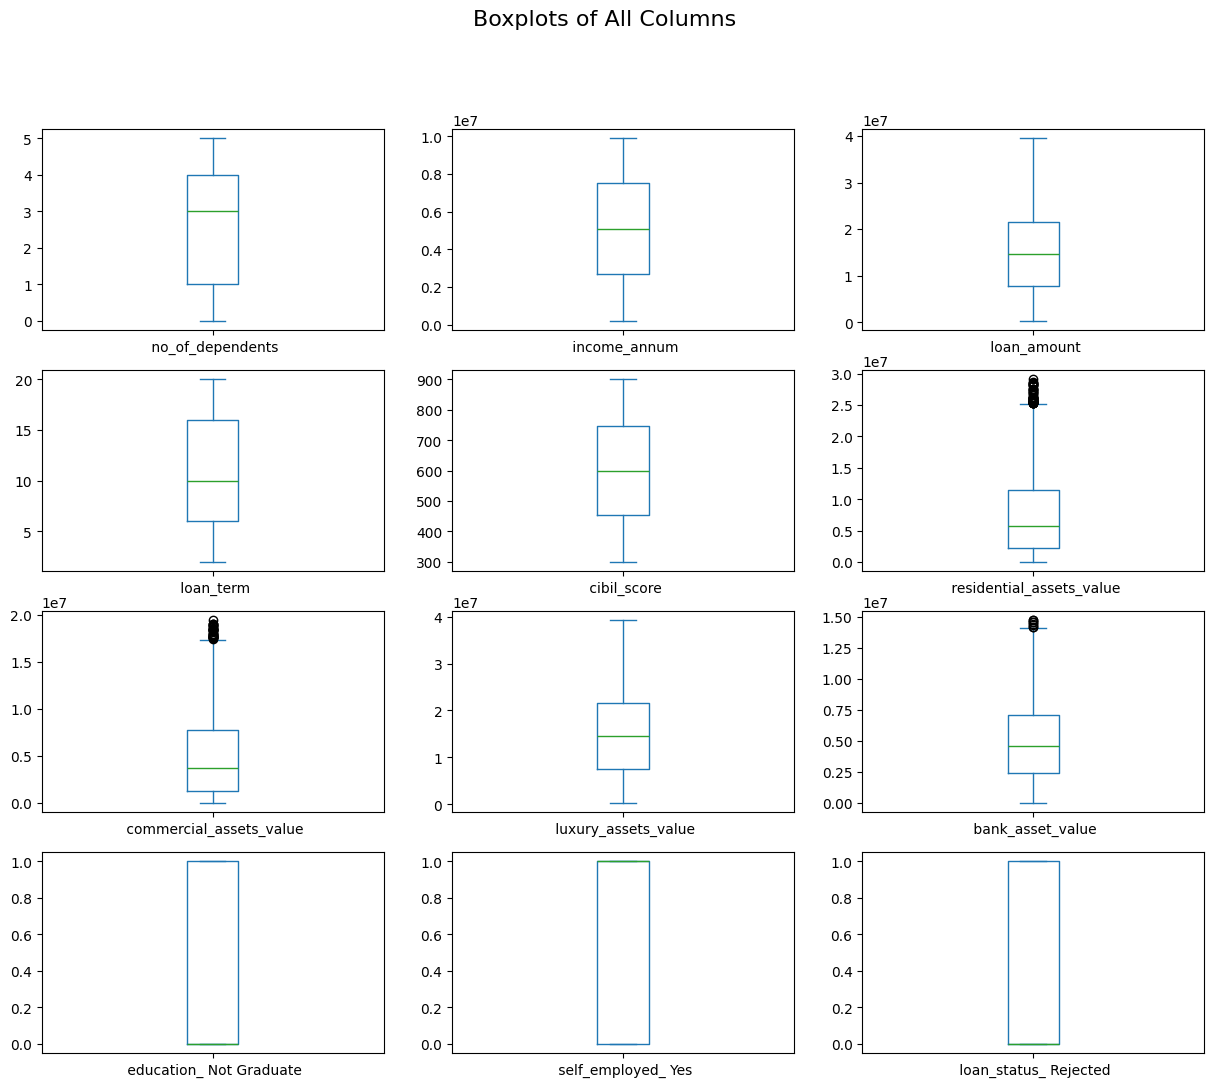

In [ ]:


# Histograms for all columns
df.hist(figsize=(15,12), bins=30)
plt.suptitle("Histograms of All Columns", fontsize=16)
plt.show()

# Boxplots for all columns
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(15,12), sharex=False, sharey=False)
plt.suptitle("Boxplots of All Columns", fontsize=16)
plt.show()


# 4. Declare feature vector and target feature


In [ ]:
x = df.drop(" loan_status_ Rejected", axis=1)
y = df[" loan_status_ Rejected"]

# 5. Split data into separate training and test set


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2,random_state = 0)

In [ ]:
x_train.shape,x_test.shape

((3392, 11), (849, 11))

In [ ]:
y_train.shape,y_test.shape

((3392,), (849,))

In [ ]:
x_train.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
1824,1,5500000,14900000,2,403,7400000,8900000,19700000,4100000,0,1
3322,4,1800000,4600000,14,453,1700000,2400000,4700000,1600000,0,1
1212,4,1300000,3600000,10,657,3200000,1900000,2900000,1100000,0,0
2631,5,5700000,18400000,4,579,12800000,4000000,17200000,4900000,1,0
543,3,1400000,2700000,8,625,3100000,1800000,3400000,1000000,1,0


# 6. Feature scaling

In [ ]:
cols = x_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [ ]:
x_train.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
count,3.392000e+03,3.392000e+03,3.392000e+03,3.392000e+03,3.392000e+03,3.392000e+03,3.392000e+03,3.392000e+03,3.392000e+03,3.392000e+03,3.392000e+03
mean,6.284281e-17,-9.452606e-17,-5.655853e-17,-3.561093e-17,7.855352e-17,5.236901e-17,-5.446377e-17,2.094760e-18,-1.474188e-16,-7.331661e-17,5.236901e-18
std,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00
min,-1.463403e+00,-1.740750e+00,-1.652203e+00,-1.552879e+00,-1.737046e+00,-1.158240e+00,-1.136921e+00,-1.635858e+00,-1.532717e+00,-1.003544e+00,-1.011266e+00
25%,-8.736607e-01,-8.495346e-01,-8.211428e-01,-8.501888e-01,-8.433415e-01,-8.189725e-01,-8.440603e-01,-8.453765e-01,-7.974940e-01,-1.003544e+00,-1.011266e+00
50%,3.058247e-01,6.032521e-03,-6.764781e-02,-1.474986e-01,-1.866560e-03,-2.946497e-01,-2.808664e-01,-6.587349e-02,-1.541739e-01,9.964685e-01,9.888592e-01
75%,8.955675e-01,8.615996e-01,7.107790e-01,9.065366e-01,8.512149e-01,5.843621e-01,6.202439e-01,7.246084e-01,6.729519e-01,9.964685e-01,9.888592e-01
max,1.485310e+00,1.717167e+00,2.691473e+00,1.609227e+00,1.744919e+00,3.329346e+00,3.233464e+00,2.634940e+00,2.970524e+00,9.964685e-01,9.888592e-01


# 7. Modeling training

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

# 8. predict result


In [ ]:
y_pred = lr.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
y_test[:10]

,loan_status_ Rejected
1476,0
304,0
88,0
849,1
1442,0
664,1
874,0
3448,1
73,0
530,0


### predict probablity

In [ ]:
lr.predict_proba(x_test)[:,0]

array([9.86154048e-01, 9.08843889e-01, 9.99843057e-01, 2.21663971e-02,
       9.88403544e-01, 6.59058102e-01, 9.46520617e-01, 8.42835124e-03,
       9.81432173e-01, 9.97845669e-01, 8.78666703e-01, 1.01694743e-01,
       9.24507193e-02, 8.04487747e-02, 6.80065175e-03, 8.40258805e-01,
       6.06096132e-01, 9.98618803e-01, 3.50390353e-02, 1.30778992e-02,
       9.97323070e-01, 1.65310030e-02, 7.34636820e-03, 9.99119626e-01,
       1.37593281e-02, 7.49072590e-01, 5.07102288e-01, 3.01147254e-02,
       9.99616447e-01, 1.50445930e-01, 2.07519624e-01, 9.96932728e-01,
       9.99545188e-01, 2.02923827e-03, 9.98662488e-01, 1.01448925e-02,
       9.59948921e-01, 9.99447227e-01, 7.04899182e-01, 9.97158021e-01,
       9.99324580e-01, 9.97078856e-01, 9.99951961e-01, 9.97642889e-01,
       2.07167255e-02, 1.07463004e-01, 9.99273618e-01, 1.72826317e-01,
       9.52758685e-03, 9.96014429e-01, 9.99700818e-01, 8.65096736e-01,
       9.70324744e-01, 8.10231697e-01, 1.60677243e-02, 1.26120138e-02,
      

In [ ]:
lr.predict_proba(x_test)[:,1]

array([1.38459523e-02, 9.11561113e-02, 1.56942757e-04, 9.77833603e-01,
       1.15964555e-02, 3.40941898e-01, 5.34793833e-02, 9.91571649e-01,
       1.85678271e-02, 2.15433054e-03, 1.21333297e-01, 8.98305257e-01,
       9.07549281e-01, 9.19551225e-01, 9.93199348e-01, 1.59741195e-01,
       3.93903868e-01, 1.38119736e-03, 9.64960965e-01, 9.86922101e-01,
       2.67692951e-03, 9.83468997e-01, 9.92653632e-01, 8.80374484e-04,
       9.86240672e-01, 2.50927410e-01, 4.92897712e-01, 9.69885275e-01,
       3.83553142e-04, 8.49554070e-01, 7.92480376e-01, 3.06727151e-03,
       4.54811726e-04, 9.97970762e-01, 1.33751194e-03, 9.89855108e-01,
       4.00510787e-02, 5.52773439e-04, 2.95100818e-01, 2.84197937e-03,
       6.75419779e-04, 2.92114431e-03, 4.80393802e-05, 2.35711074e-03,
       9.79283275e-01, 8.92536996e-01, 7.26382034e-04, 8.27173683e-01,
       9.90472413e-01, 3.98557058e-03, 2.99181582e-04, 1.34903264e-01,
       2.96752563e-02, 1.89768303e-01, 9.83932276e-01, 9.87387986e-01,
      

# 9. check accuracy score

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9045936395759717


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       515
           1       0.90      0.85      0.87       334

    accuracy                           0.90       849
   macro avg       0.90      0.89      0.90       849
weighted avg       0.90      0.90      0.90       849



In [ ]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[485  30]
 [ 51 283]]


In [ ]:
import numpy as np

# Method 1: Using value_counts
pd.Series(y_pred).value_counts()

# Method 2: Using NumPy
accepted_pred = np.sum(y_pred == 0)
rejected_pred = np.sum(y_pred == 1)

print("Predicted Accepted:", accepted_pred)
print("Predicted Rejected:", rejected_pred)


Predicted Accepted: 536
Predicted Rejected: 313


In [ ]:
y.value_counts()


,count
loan_status_ Rejected,
0,2640
1,1601


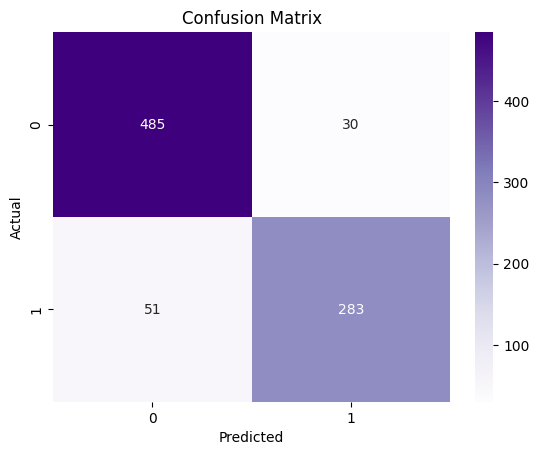

In [ ]:
#visualize confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , annot = True, fmt = 'd', cmap = 'Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. More about score, precision, recall and f1-score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


## classification_accuracy


In [ ]:
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9046


## classification_error

In [ ]:
classification_error = (FP + FN) / (TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0954


## Precision

In [ ]:
precision = TP / (TP + FP)

print('Precision : {0:0.4f}'.format(precision))



Precision : 0.9417


In [ ]:
# micro precision

precision_micro = precision_score(y_test, y_pred, average='micro')

print('Micro Precision : {0:0.4f}'.format(precision_micro))

Micro Precision : 0.9046


In [ ]:
# macro precision

precision_macro = precision_score(y_test, y_pred, average='macro')

print('Macro Precision : {0:0.4f}'.format(precision_macro))

Macro Precision : 0.9045


In [ ]:
# weighted precision

precision_weighted = precision_score(y_test, y_pred, average='weighted')

print('Weighted Precision : {0:0.4f}'.format(precision_weighted))

Weighted Precision : 0.9046


## Recall

In [ ]:
recall = TP / (TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9049


In [ ]:
# micro recall

recall_micro = recall_score(y_test, y_pred, average='micro')

print('Micro Recall : {0:0.4f}'.format(recall_micro))

Micro Recall : 0.9046


In [ ]:
# macro recall

recall_macro = recall_score(y_test, y_pred, average='macro')

print('Macro Recall : {0:0.4f}'.format(recall_macro))

Macro Recall : 0.8945


In [ ]:
#weighted recall

recall_weighted = recall_score(y_test, y_pred, average='weighted')

print('Weighted Recall : {0:0.4f}'.format(recall_weighted))

Weighted Recall : 0.9046


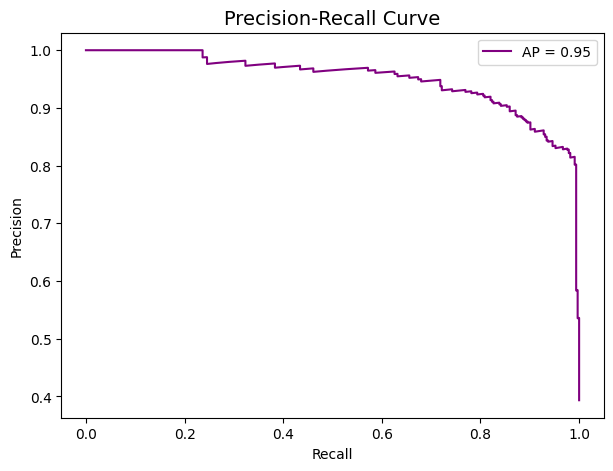

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color='purple', label=f"AP = {avg_precision:.2f}")
plt.title("Precision-Recall Curve", fontsize=14)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


## F1-score

In [ ]:
manual_f1_score = 2 * precision * recall / (precision + recall)
print('Manual F1 Score : {0:0.4f}'.format(manual_f1_score))


Manual F1 Score : 0.9229


In [ ]:
# micro F1-Score

f1_score_micro = f1_score(y_test, y_pred, average='micro')
print('Micro F1 Score : {0:0.4f}'.format(f1_score_micro))


Micro F1 Score : 0.9046


In [ ]:
# macro F1-Score

f1_score_macro = f1_score(y_test, y_pred, average='macro')

print('Macro F1 Score : {0:0.4f}'.format(f1_score_macro))

Macro F1 Score : 0.8989


In [ ]:
# weighted F1-Score

f1_score_weighted = f1_score(y_test, y_pred, average='weighted')

print('Weighted F1 Score : {0:0.4f}'.format(f1_score_weighted))

Weighted F1 Score : 0.9040


<Figure size 800x500 with 0 Axes>

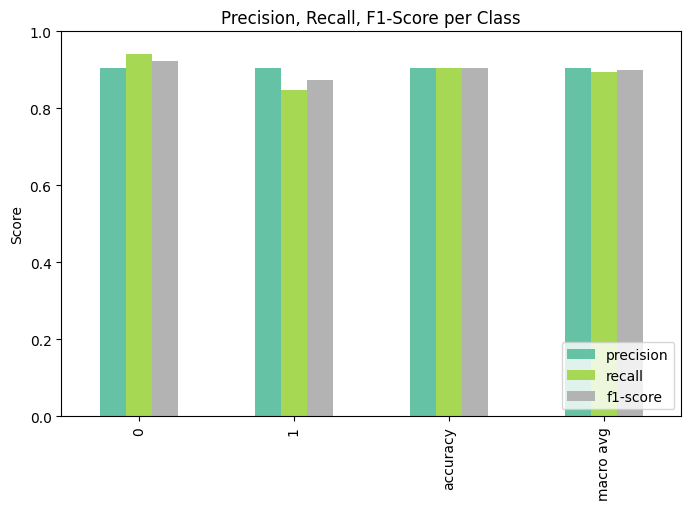

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,5))
metrics_df[['precision', 'recall', 'f1-score']][:-1].plot(kind='bar', figsize=(8,5), colormap='Set2')
plt.title("Precision, Recall, F1-Score per Class")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()


# 11. ROC - AUC

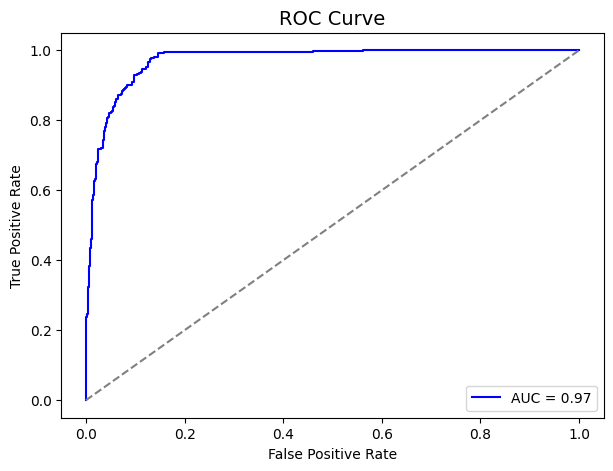

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = lr.predict_proba(x_test)[:, 1]

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


## feature importance

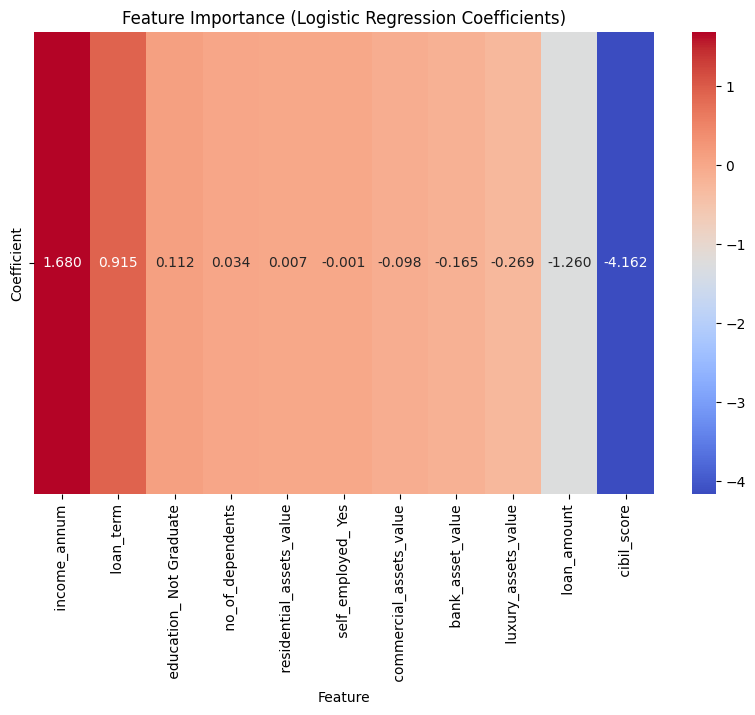

In [ ]:
# Feature Importance


coefficients = lr.coef_[0]
features = x.columns


feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})


feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)


plt.figure(figsize=(10,6))
sns.heatmap(
    feature_importance.set_index('Feature').T,
    annot=True,
    cmap="coolwarm",
    fmt=".3f",
    cbar=True
)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()


## cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.74440518 0.71698113 0.7370283  0.7370283  0.7240566 ]
Mean CV Accuracy: 0.7318999044380736


## check for overfitting

In [ ]:
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = lr.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")

# Test accuracy
y_test_pred = lr.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")

# Check model status
if train_acc - test_acc > 0.1:
    print("⚠️ The model is overfitting.")
elif test_acc - train_acc > 0.1:
    print("⚠️ The model is underfitting.")
else:
    print("✅ The model is well-balanced.")


Training Accuracy: 0.9177
Test Accuracy: 0.9046
✅ The model is well-balanced.


# Bonus

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [ ]:
print("Train class balance BEFORE SMOTE:\n", y_train.value_counts(normalize=True))

Train class balance BEFORE SMOTE:
  loan_status_ Rejected
0    0.626474
1    0.373526
Name: proportion, dtype: float64


In [ ]:
sm = SMOTE(random_state=42, k_neighbors=5)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [ ]:
print("Train class balance AFTER SMOTE:\n", y_train_sm.value_counts(normalize=True))

Train class balance AFTER SMOTE:
  loan_status_ Rejected
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
lr_sm = LogisticRegression()
lr_sm.fit(x_train_sm, y_train_sm)

LogisticRegression()

In [ ]:
y_pred_sm = lr_sm.predict(x_test)
y_prob_sm = lr_sm.predict_proba(x_test)[:, 1]

print("\nSMOTE Test Accuracy:", accuracy_score(y_test, y_pred_sm))
print("SMOTE Test AUC:", roc_auc_score(y_test, y_prob_sm))
print("\nSMOTE Classification Report:\n", classification_report(y_test, y_pred_sm))


SMOTE Test Accuracy: 0.9128386336866903
SMOTE Test AUC: 0.9721004592756235

SMOTE Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       515
           1       0.88      0.90      0.89       334

    accuracy                           0.91       849
   macro avg       0.91      0.91      0.91       849
weighted avg       0.91      0.91      0.91       849



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_sm, y_train_sm)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt.predict(x_test)
y_prob_dt = dt.predict_proba(x_test)[:, 1]

In [ ]:
print("\nDecision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Test AUC:", roc_auc_score(y_test, y_prob_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))



Decision Tree Test Accuracy: 0.9705535924617197
Decision Tree Test AUC: 0.9699407011220277

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       515
           1       0.96      0.97      0.96       334

    accuracy                           0.97       849
   macro avg       0.97      0.97      0.97       849
weighted avg       0.97      0.97      0.97       849



In [ ]:
models = ['Logistic Regression (SMOTE)', 'Decision Tree']
accuracy_scores = [
    accuracy_score(y_test, y_pred_sm),
    accuracy_score(y_test, y_pred_dt)
]
auc_scores = [
    roc_auc_score(y_test, y_prob_sm),
    roc_auc_score(y_test, y_prob_dt)
]

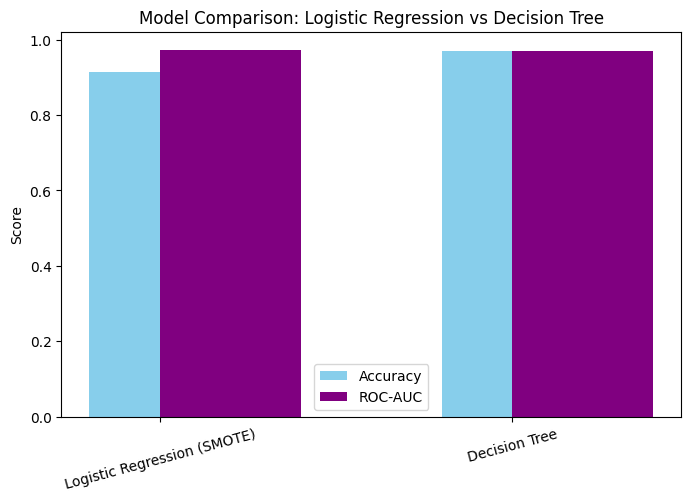

In [ ]:
x = range(len(models))
plt.figure(figsize=(8,5))
plt.bar(x, accuracy_scores, width=0.4, label='Accuracy', color='skyblue', align='center')
plt.bar(x, auc_scores, width=0.4, label='ROC-AUC', color='purple', align='edge')
plt.xticks(x, models, rotation=15)
plt.ylabel('Score')
plt.title('Model Comparison: Logistic Regression vs Decision Tree')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
x_train = pd.DataFrame(x_train, columns=cols)
x_test = pd.DataFrame(x_test, columns=cols)


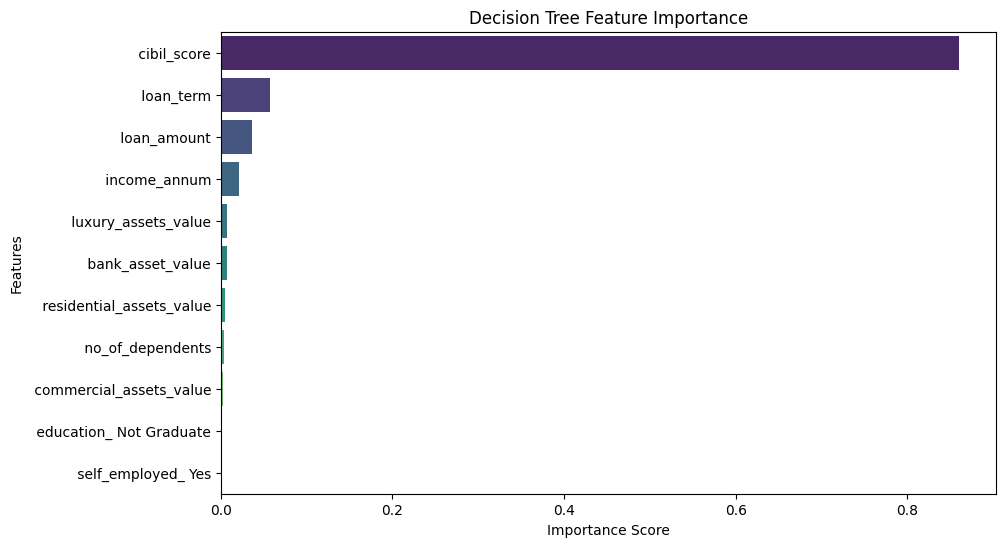

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': dt.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## ROC - AUC comparison

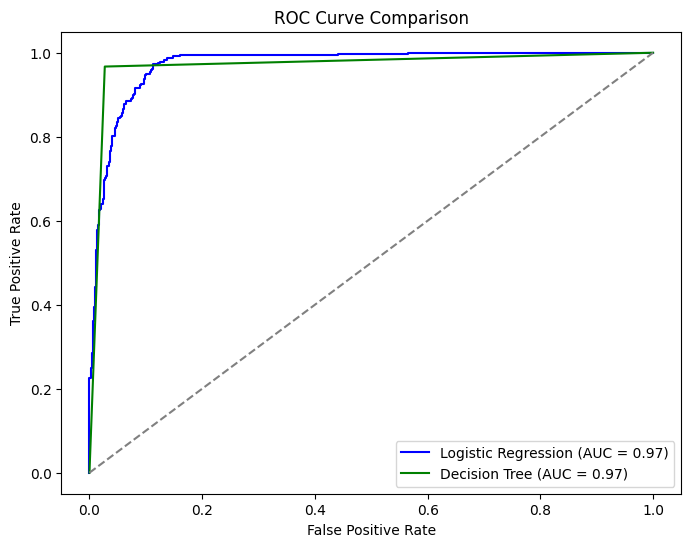

In [ ]:
# ROC Curve for both models together
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_sm)
auc_lr = roc_auc_score(y_test, y_prob_sm)

# Decision Tree ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot both ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, color='green', label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
